# Pauli Evolution Visualization Examples

This notebook demonstrates how to use the PauliTreeTracker for visualizing Pauli string evolution during quantum circuit propagation. The visualization capability allows you to track how Pauli strings transform through different types of quantum gates and noise channels.

## Features Demonstrated:
- **Tree Tracking**: Visualize the branching evolution of Pauli strings
- **GraphViz Export**: Generate DOT files for professional tree diagrams
- **JSON Export**: Export evolution data for further analysis
- **Multiple Gate Types**: Pauli rotations, Clifford gates, and noise channels
- **Merging**: Visualize the merging of Pauli strings

*Note: You will need to install the [GraphViz](https://graphviz.org/download/) to visualize the tree.*

*The truncation visualization is not supported yet.*

In [1]:
# Import required packages
using PauliPropagation
using Random
using PlotGraphviz

In [2]:
# check the GraphViz installation
run(`dot -V`)

dot - graphviz version 2.43.0 (0)


Process(`dot -V`, ProcessExited(0))

## Helper Functions

First, let's define some helper functions to create different types of quantum circuits for our examples.


In [3]:
# Mixed circuit with Clifford and Pauli rotation gates
function create_example_circuit()
    return [
        CliffordGate(:X, 1),
        PauliRotation(:X, 1),    # RX rotation (branches)
        CliffordGate(:H, 1),     # Hadamard gate (no branching)
        PauliRotation(:Z, 1),    # RZ rotation (branches)
        CliffordGate(:Z, 1),     # Z gate (no branching)
    ]
end

println("Helper functions defined!")


Helper functions defined!


The example below shows how to visualize the propagation of a Pauli string through a circuit.

**Circuit: X -> RX(θ₁) -> H -> RZ(θ₂) -> Z**


In [4]:
export_filename="pauli_evolution_example"
# Create a simple 1-qubit Pauli Sum: X₁ + Y₁ + Z₁
nqubits = 1
psum = PauliSum(nqubits)
add!(psum, [:X], [1], 1.0)
add!(psum, [:Y], [1], 1.0)
add!(psum, [:Z], [1], 1.0)

# Create example circuit
circ = create_example_circuit()

# Set some parameter values
thetas = [π / 4, π / 6]  # θ₁ = π/4, θ₂ = π/6
println("Parameters: θ₁ = π/4, θ₂ = π/6")



Parameters: θ₁ = π/4, θ₂ = π/6


To visualize the propagation, you first need to reset the global tree storage by calling ``reset_tree!()`` or set ``reset_tree_first=true`` in the ``propagate_with_tree_tracking`` function.

The main function to visualize the propagation is ``propagate_with_tree_tracking``. It takes in a circuit, a Pauli string, and a list of parameters. You can specify the export format to be ``graphviz`` or ``json`` or ``summary``.

In [5]:
reset_tree!()

println("Running propagation with tree tracking...")
result = propagate_with_tree_tracking(
    circ, psum, thetas;
    export_format="summary",
    reset_tree_first=true
)

println("\nFinal result:")
println(result)


Running propagation with tree tracking...

Final result:
PauliSum(nqubits: 1, 3 Pauli terms:
 0.70711 * Y
 1.2247 * Z
 1.0 * X
)


After running the propagation, you can visualize the evolution tree by calling `visualize_tree` function.
for graphviz format, if no filename is provided, the tree will be directly plotted, otherwise, the tree will be exported to the file in DOT format. For json format, filename is required.
You can customize the graph by passing optional arguments to the `visualize_tree` function like `node_shape`, `edge_style`, `graph_title`, `show_coefficients`, etc.

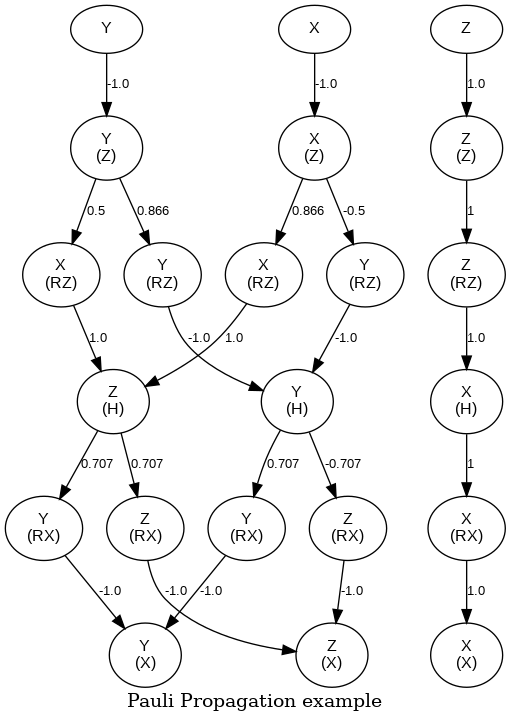

In [6]:
visualize_tree("graphviz",graph_title="Pauli Propagation example")

In [7]:
# You can save the tree to a file for later use.
println("Exporting to GraphViz...")
visualize_tree("graphviz", filename=export_filename*".dot")

println("Exporting to JSON...")
visualize_tree("json", filename=export_filename*".json")


Exporting to GraphViz...
Evolution tree exported to pauli_evolution_example.dot
To visualize, run: dot -Tpng pauli_evolution_example.dot -o pauli_tree.png
Exporting to JSON...
Evolution tree exported to pauli_evolution_example.json


By default, the merging are implicitly shown in the graph, if you want to see the merge nodes, you can set the `show_merge_nodes` to true.

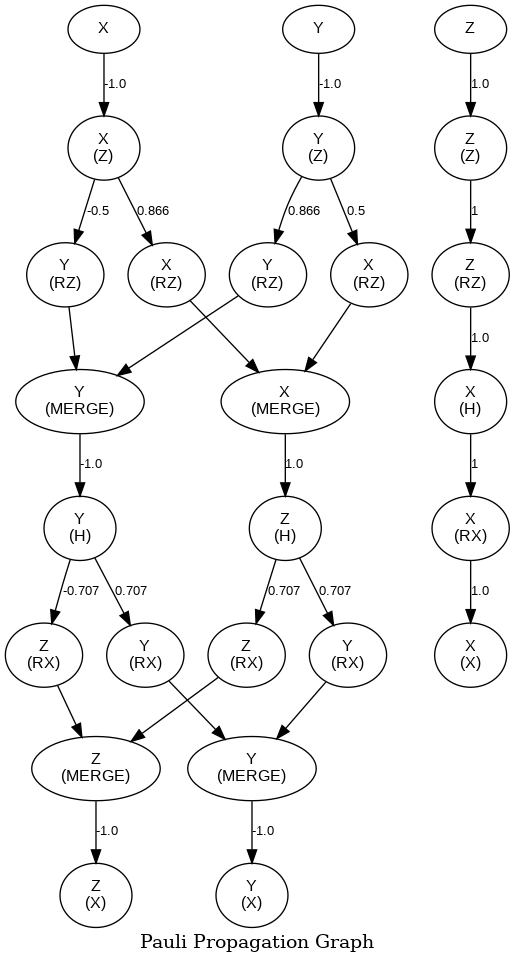

In [8]:
visualize_tree("graphviz", show_merge_nodes=true, scale=20)

### Understanding the Tree Structure

- **Nodes**: Represent Pauli strings at different points in evolution, and the gate that is applied to the Pauli string shown in the parentheses.
- **Edges**: Show the coefficient get multiplied to the Pauli string through Pauli Transformation.
- **Merging**: Occurs when same Pauli strings are merged into one.

The visualization can also be used for multi-qubit systems, however, when circuit become large, the graph will become too complex to visualize. If your visualization is big, remember to set the `scale` parameter to a larger value to avoid the graph being cropped.